<a href="https://colab.research.google.com/github/anhnguyenicyqs/Using-AUC-and-ROC-in-supervised-learning-Apple-quality-classification-/blob/main/try1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.8925
Bao cao phan loai:
               precision    recall  f1-score   support

         0.0       0.89      0.89      0.89       401
         1.0       0.89      0.89      0.89       399

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800

ConfusionMatrix:
 [[358  43]
 [ 43 356]]


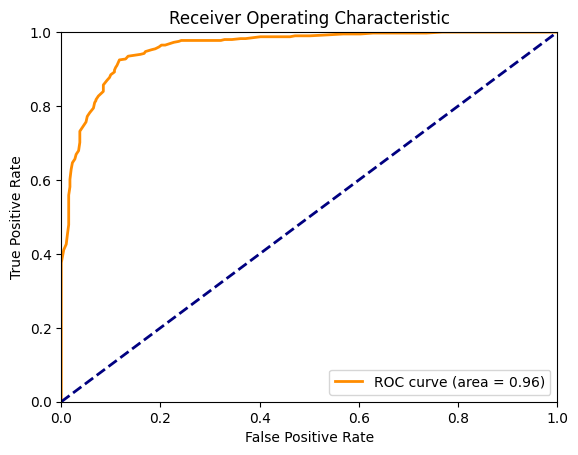

New apple quality: good


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn keras tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Xử lý dữ liệu
data = pd.read_csv('apple_quality.csv')
data['Acidity'] = pd.to_numeric(data['Acidity'], errors='coerce')
data['Quality'] = data['Quality'].map({'good': 1, 'bad': 0})
data = data.dropna()
X = data.drop('Quality', axis=1)
y = data['Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Bao cao phan loai:\n", classification_report(y_test, y_pred))
print("ConfusionMatrix:\n", confusion_matrix(y_test, y_pred))

# Dùng hàm, tính AUC và vẽ ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Hàm dự đoán chất lượng của táo tàu mới :)))
def predict_quality(features):
    """
    Dự đoán chất lượng của táo .

    :param features: Danh sách các đặc trưng của táo
    :return: Chất lượng dự đoán
    """
    prediction = model.predict([features])
    return prediction[0]

# Ví dụ dự đoán với các giá trị đặc trưng của táo mới nhập chợ long biên
new_apple_features = [1, 150, 200, 8, 7, 6, 9, 4.5]
quality = predict_quality(new_apple_features)
print("New apple quality:", "good" if quality == 1 else "bad")